# My Project — Iteration 1

See assignment 5 for my project definition and objectives.

In a nutshell, it is to explore the text of the novels of Arthur Conan Doyle.

This iteration is deliberately simple: read the file, count the characters in it, classify the characters, and then draw a chart of some sort.

## Introduction
I downloaded the text of 'a Study in Scarlet' from Project Gutenberg 
[www.gutenberg.org] and edited it to remove copyright and licence notices 
using a simple text editor.

* 23 lines of text from the beginning of the file
* 351 lines of text from the end of the book

The remaining text of the book is then a file of 4740 lines consisting of a 
total of 239,249 characters. (As measured by my text editor)

## Reading the file into Python
As the file is of modest size, I decided to read it into a single string.
The alternative would be to read it into a list of strings, one string for each 
line of the book, but that seemed to be introducing additional complexity at too
early a stage for no good reason.

A sketch of the code to do this is:-

In [1]:
with open('scarlet.txt', mode='r', encoding='utf-8') as book_file:
    book = book_file.read()

In [2]:
len(book)

239430

As I am planning to look at all the books of ACD, that snippet of code to read a book into a string looks useful enough to render as a function.

In [3]:
def read_book_to_str(book_file_name):
    with open(book_file_name, mode='r', encoding='utf-8') as book_file_handle:
        book_as_str = book_file_handle.read()
        return book_as_str

In [4]:
scarlet_str = read_book_to_str('scarlet.txt')

OK, so now that we have "A Study in Scarlet" represented as a string, let's make a start by doing some simple analysis of what characters are in the string:

* Count of uppercase A-Z
* Count of lowercase a-z
* Count of digits 0–9
* Count of punctuation 
* Count of whitespace
* Count of space " "

First I will do that using literals, then I will do it again using the constant in the string library:

In [5]:
# Define what counts a lowercase, uppercase, etc.
lowercase = 'abcdefghijklmnopqrstuvwxyz'
uppercase = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
digits = '0123456789'
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
space = ' '
whitespace = '\t\n\r'

# set counters to zero
count_scarlet_len = len(scarlet_str)
count_scarlet_chars = 0
count_scarlet_uppercase = 0
count_scarlet_lowercase = 0
count_scarlet_digits = 0
count_scarlet_punctuation = 0
count_scarlet_space = 0
count_scarlet_whitespace = 0
count_scarlet_other = 0

# iterate through the book classifying each character in turn
for char in scarlet_str:
    count_scarlet_chars += 1
    if char in lowercase:
        count_scarlet_lowercase += 1
    elif char in uppercase:
        count_scarlet_uppercase += 1
    elif char in digits:
        count_scarlet_digits += 1
    elif char in punctuation:
        count_scarlet_punctuation += 1
    elif char in space:
        count_scarlet_space += 1
    elif char in whitespace:
        count_scarlet_whitespace += 1
    else:
        count_scarlet_other += 1



Now that we have a good number of counts lets:

* Just because I am curious, check if `count_scarlet_len == count_scarlet_chars`
* Print all the counts for comparison
* Draw a pie chart showing the relative magnitudes of these counts  

In [6]:
print(
    f'count_scarlet_len = {count_scarlet_len} and count_scarlet_chars = {count_scarlet_chars} are equal?')

count_scarlet_len = 239430 and count_scarlet_chars = 239430 are equal?


In [7]:
print(f'count_scarlet_uppercase = {count_scarlet_uppercase}        ')
print(f'count_scarlet_lowercase = {count_scarlet_lowercase}        ')
print(f'count_scarlet_digits = {count_scarlet_digits}              ')
print(f'count_scarlet_punctuation = {count_scarlet_punctuation}    ')
print(f'count_scarlet_space = {count_scarlet_space}                ')
print(f'count_scarlet_whitespace = {count_scarlet_whitespace}      ')
print(f'count_scarlet_other = {count_scarlet_other}                ')
print(f'count_scarlet_whitespace = {count_scarlet_whitespace}      ')
print(f'count_scarlet_other = {count_scarlet_other}                ')

count_scarlet_uppercase = 5688        
count_scarlet_lowercase = 180652        
count_scarlet_digits = 78              
count_scarlet_punctuation = 6217    
count_scarlet_space = 39641                
count_scarlet_whitespace = 4739      
count_scarlet_other = 2415                
count_scarlet_whitespace = 4739      
count_scarlet_other = 2415                


Borrow some code for a pie chart from w3schools.com

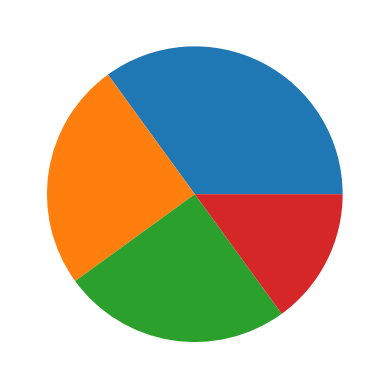

In [8]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])

plt.pie(y)
plt.show()

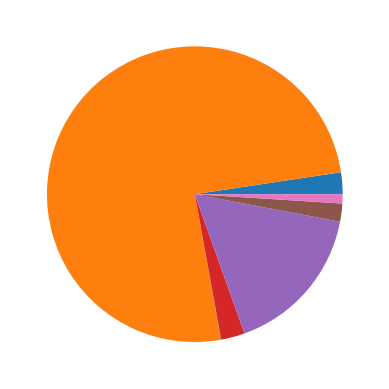

In [9]:
# prepare counts from scarlet
y = np.array(
    [count_scarlet_uppercase, count_scarlet_lowercase, count_scarlet_digits,
     count_scarlet_punctuation, count_scarlet_space, count_scarlet_whitespace,
     count_scarlet_other])
plt.pie(y)
plt.show()

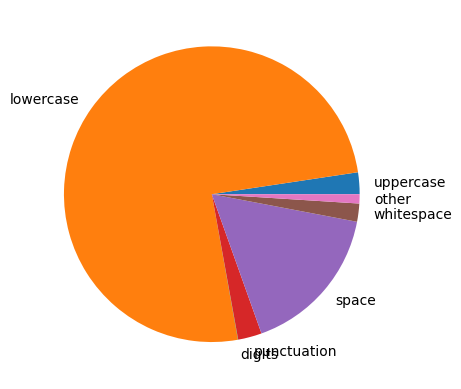

In [10]:
# add labels
my_labels = ['uppercase', 'lowercase', 'digits', 'punctuation', 'space',
             'whitespace', 'other']
# and draw it again, this time with labels

plt.pie(y, labels=my_labels)
plt.show() 


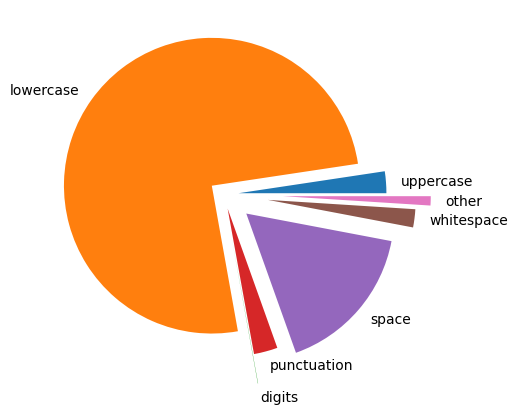

In [11]:
# Pull all those pieces together into to a single block of code.
y = np.array(
    [count_scarlet_uppercase, count_scarlet_lowercase, count_scarlet_digits,
     count_scarlet_punctuation, count_scarlet_space, count_scarlet_whitespace,
     count_scarlet_other])
# label the counts
my_labels = ['uppercase', 'lowercase', 'digits', 'punctuation', 'space',
             'whitespace', 'other']
# and draw it again, but this time exploded, hopefully aiding legibility
my_explode = [0.1, 0.1, 0.3, 0.1, 0.2, 0.3, 0.4]

plt.pie(y, labels=my_labels, explode=my_explode)
plt.show() 


## end of Iteration 1
I copied the function `read_book_to_str(book_file_name)` into a python script so that it is available to all the Jupyter notebooks I create for this project. 
I've done the same for counting the various types if characters and called that function `book_char_counts()` in the same module.
